2

Perplexity:  282.43275163987937

Coherence Score:  0.3629470461505339
3

Perplexity:  284.7890578655295

Coherence Score:  0.4035035264120091
4

Perplexity:  290.80756011129375

Coherence Score:  0.35795636334235514
5

Perplexity:  300.61118235879934

Coherence Score:  0.3435868052052025
6

Perplexity:  307.4022668762898

Coherence Score:  0.3387627800773836
7

Perplexity:  315.57639551631297

Coherence Score:  0.38220446026914373
8

Perplexity:  325.24790763210524

Coherence Score:  0.3898088571915229
9

Perplexity:  330.47896533214123

Coherence Score:  0.3893079329904198
10

Perplexity:  335.1422071043387

Coherence Score:  0.3969813181188355
11

Perplexity:  342.46724650194966

Coherence Score:  0.4248787601182231
12

Perplexity:  340.82766836325715

Coherence Score:  0.389557965651346
13

Perplexity:  344.4594260200396

Coherence Score:  0.4110908258509989
14

Perplexity:  385.51126239957193

Coherence Score:  0.41074961489079825
15

Perplexity:  620.4477589829336

Coherence Sc

C:\Users\wdnmd\anaconda3\envs\LDAText\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\wdnmd\anaconda3\envs\LDAText\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


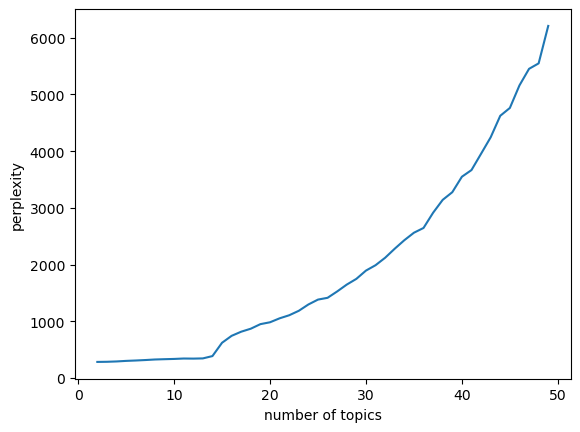

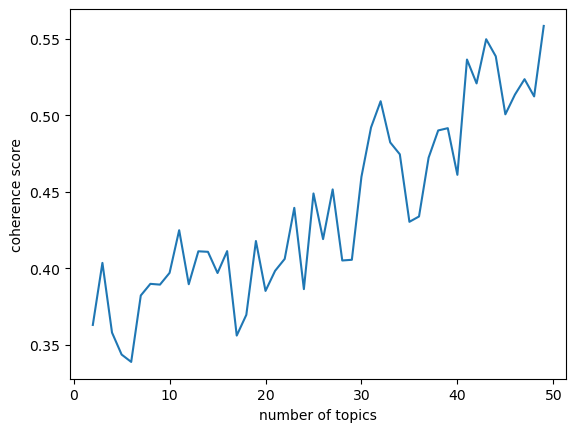

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt


import pyLDAvis

# 这是一个示例 Python 脚本。

# 按 Shift+F10 执行或将其替换为您的代码。
# 按 双击 Shift 在所有地方搜索类、文件、工具窗口、操作和设置。

import LDA
import LanguageDetect as ld

# 德语与英语混合训练
def show_and_save_vis(vis, filename='output.html'):
    pyLDAvis.save_html(vis, filename)
    pyLDAvis.show(vis,local=False)


# 按装订区域中的绿色按钮以运行脚本。
def train(num_topics):
    file = 'data/LDAData.xlsx'
    data = LDA.load_data(file)
    datas = ld.language_detect(data)
    data_lemmatized = LDA.pre_data(datas['en'], 'en') +  LDA.pre_data(datas['de'], 'de')
    # data_lemmatized = LDA.pre_data(datas['de'], 'de')
    dictionary = LDA.create_dictionary(data_lemmatized)
    corpus = LDA.text2bow(data_lemmatized, dictionary)
    vis,plx,coherence = LDA.LDA(corpus, dictionary, data_lemmatized, num_topics)
    save_html_file = "./result/topic"+str(num_topics)+".html"
    pyLDAvis.save_html(vis,save_html_file)
    return vis,plx,coherence
    # show_and_save_vis(vis, filename='output.html')

plxs = []
scores = []
n_max_topics = 50
for i in range(2,n_max_topics):
    print(i)
    vis,plx,coherence = train(i)
    plxs.append(plx)
    scores.append(coherence)


n_t=50
x=list(range(2,n_t))
plt.plot(x,plxs[0:n_t])
plt.xlabel("number of topics")
plt.ylabel("perplexity")
plt.show()

plt.plot(x,scores[0:n_t])
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

50

Perplexity:  1147.8892583197405

Coherence Score:  0.517695006207306
51

Perplexity:  1216.7982788846227

Coherence Score:  0.5546333293325878
52

Perplexity:  1238.2787089566602

Coherence Score:  0.5419113089074232
53

Perplexity:  1250.053413905404

Coherence Score:  0.5728409584947957
54

Perplexity:  1276.8803741200936

Coherence Score:  0.5867205166754447
55

Perplexity:  1310.731325135769

Coherence Score:  0.5928742433338794
56

Perplexity:  1329.062712783808

Coherence Score:  0.5674162646902959
57

Perplexity:  1358.5793627857383

Coherence Score:  0.5322508002165693
58

Perplexity:  1429.197196751948

Coherence Score:  0.6514071156524575
59

Perplexity:  1410.8413244554959

Coherence Score:  0.5901224696908955
60

Perplexity:  1478.3789624008336

Coherence Score:  0.6033966569484065
61

Perplexity:  1507.6265997174087

Coherence Score:  0.5967598666123244
62

Perplexity:  1541.8320026713384

Coherence Score:  0.6295932672762506
63

Perplexity:  1631.9953060513421

Cohere

C:\Users\wdnmd\anaconda3\envs\LDAText\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\wdnmd\anaconda3\envs\LDAText\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


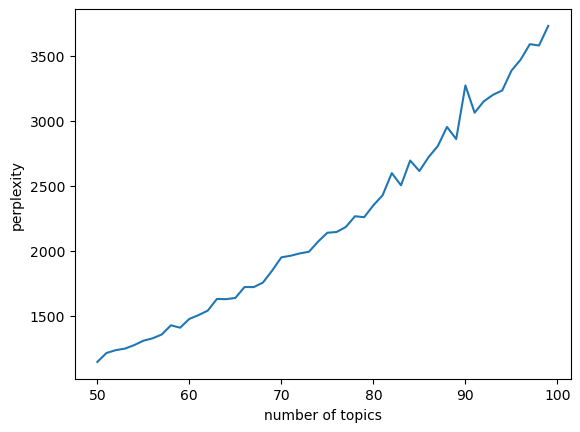

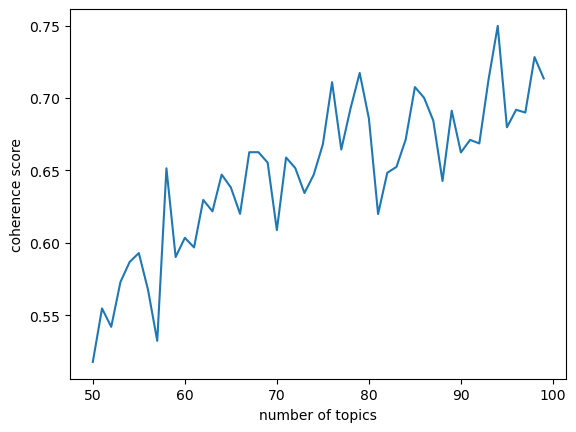

In [1]:
%matplotlib inline
# 德语单独训练
from matplotlib import pyplot as plt


import pyLDAvis

# 这是一个示例 Python 脚本。

# 按 Shift+F10 执行或将其替换为您的代码。
# 按 双击 Shift 在所有地方搜索类、文件、工具窗口、操作和设置。

import LDA
import LanguageDetect as ld


def show_and_save_vis(vis, filename='output.html'):
    pyLDAvis.save_html(vis, filename)
    pyLDAvis.show(vis,local=False)


# 按装订区域中的绿色按钮以运行脚本。
def train(num_topics):
    file = 'data/LDAData.xlsx'
    data = LDA.load_data(file)
    datas = ld.language_detect(data)
    # data_lemmatized = LDA.pre_data(datas['en'], 'en') +  LDA.pre_data(datas['de'], 'de')
    data_lemmatized = LDA.pre_data(datas['de'], 'de')
    dictionary = LDA.create_dictionary(data_lemmatized)
    corpus = LDA.text2bow(data_lemmatized, dictionary)
    vis,plx,coherence = LDA.LDA(corpus, dictionary, data_lemmatized, num_topics)
    save_html_file = "./result_de/topic"+str(num_topics)+".html"
    #pyLDAvis.save_html(vis,save_html_file)
    return vis,plx,coherence
    # show_and_save_vis(vis, filename='output.html')

plxs = []
scores = []
n_max_topics = 100
for i in range(50,n_max_topics):
    print(i)
    vis,plx,coherence = train(i)
    plxs.append(plx)
    scores.append(coherence)


n_t=len(plxs)
x=list(range(50,100))
plt.plot(x,plxs[0:n_t])
plt.xlabel("number of topics")
plt.ylabel("perplexity")
plt.show()

plt.plot(x,scores[0:n_t])
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [1]:
%matplotlib inline
# 德语单独训练
from matplotlib import pyplot as plt


import pyLDAvis

# 这是一个示例 Python 脚本。

# 按 Shift+F10 执行或将其替换为您的代码。
# 按 双击 Shift 在所有地方搜索类、文件、工具窗口、操作和设置。

import LDA
import LanguageDetect as ld


def show_and_save_vis(vis, filename='output.html'):
    pyLDAvis.save_html(vis, filename)
    pyLDAvis.show(vis,local=False)


# 按装订区域中的绿色按钮以运行脚本。
def train(num_topics):
    file = 'data/LDAData.xlsx'
    data = LDA.load_data(file)
    datas = ld.language_detect(data)
    # data_lemmatized = LDA.pre_data(datas['en'], 'en') +  LDA.pre_data(datas['de'], 'de')
    data_lemmatized = LDA.pre_data(datas['de'], 'de')
    dictionary = LDA.create_dictionary(data_lemmatized)
    corpus = LDA.text2bow(data_lemmatized, dictionary)
    vis,plx,coherence = LDA.LDA(corpus, dictionary, data_lemmatized, num_topics)
    save_html_file = "./result_de/topic"+str(num_topics)+".html"
    #pyLDAvis.save_html(vis,save_html_file)
    return vis,plx,coherence
    # show_and_save_vis(vis, filename='output.html')


vis,plx,coherence = train(10)
show_and_save_vis(vis,filename='output.html')


C:\Users\1\PycharmProjects\LDATest\LDA.py:32: SyntaxWarning: invalid escape sequence '\S'
  data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
C:\Users\1\PycharmProjects\LDATest\LDA.py:33: SyntaxWarning: invalid escape sequence '\s'
  data = [re.sub('\s+', ' ', sent) for sent in data]


ImportError: cannot import name 'triu' from 'scipy.linalg' (C:\Users\1\anaconda3\Lib\site-packages\scipy\linalg\__init__.py)